<a href="https://colab.research.google.com/github/SHsix/Embedded_System/blob/master/Python_%EA%B8%B0%EC%B4%88/lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPENCV 기초
#### - IMAGE 불러오기
#### - 이 방법은 Colab에서 사용하는 이미지 불러오는 방법 (다른 환경에서 진행할 필요는 없습니다)

In [0]:
import cv2
import matplotlib.pyplot as plt   # Colab에서는 윈도우 창을 띄울 수 없기 때문에 사용하는 API
import numpy as np


In [0]:
from google.colab import files
uploaded = files.upload()

Saving lec3_test.jpg to lec3_test.jpg


#Open CV의 기본 함수


### cv2.imread(file_name, FLAG)
>FLAG - 이미지를 읽는 방법 설정
>*   cv2.IMREAD_COLOR : 이미지를 Color로 읽고, 투명한 부분은 무시
>*   cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽기
>*   반환값: Numpy 객체(행, 열, 색상 : 기본 BGR)

### cv2.cvtColor(image, FLAG)
> image : 이미지 객체
> FLAG
>* cv2.COLOR_BGR2GRAY : 이미지를 BGR에서 GRAY로 변경
>* cv2.COLOR_BGR2HSV : 이미지를 BGR에서 HSV로 변경
>
>여러가지 FLAG가 있음


### cv2.imshow(Window_title, image)
> Window_title : 윈도우 창 이름
> image : 출력할 이미지 객체


### cv2.imwrite(FILE_NAME, image)
> FILE_NAME : 저장할 파일 이름
> image : 저장할 이미지 객체


### cv2.waitKey(TIME)
> TIME : 키보드 입력 대기 시간( 0 : 무한대기)
> 반환 - 사용자가 입력한 Ascii Code



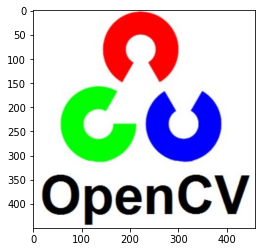

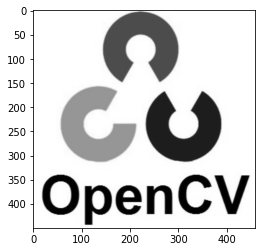

In [0]:


img = cv2.imread('lec3_test.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(Gray_img,cv2.COLOR_GRAY2RGB))
plt.show()


## 참고 : 일반 OpenCV 이미지 불러오는 방법
![title](https://github.com/SHsix/Embedded_System/blob/master/Python_%EA%B8%B0%EC%B4%88/img/lec03_figure1.png?raw=1)

# 이미지 픽셀 별 연산 
#### ROI 특정 관심 있는 영역을 추출할 수 있습니다.
#### 각각의 픽셀을 이용하여 Color data를 수정 및 변환할 수 있습니다.
#### img[0][0][0] - 0, 0 픽셀의 색 B 값을 의미 (OpenCV에서는 색을 BGR 순서로 인식)



In [0]:
from google.colab import files
uploaded = files.upload()

Saving lec03_test1.png to lec03_test1.png


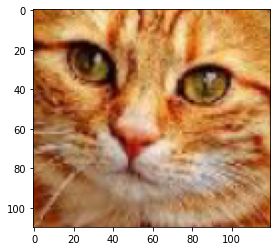

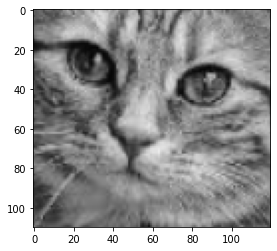

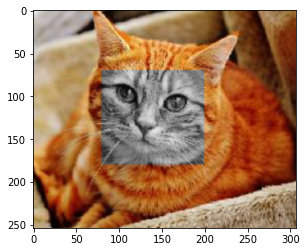

In [0]:

img_2 = cv2.imread('lec03_test1.png')

# Numpy Slicing : ROI 처리
logo = img_2[70:180, 80:200]
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.show()


height, width = logo.shape[:2]
gray_logo = np.zeros((height, width, 1)).astype(np.uint8)

for j in range(height):
  for i in range(width):
    gray_logo[j][i] = int(logo[j][i].sum()/3)


plt.imshow(cv2.cvtColor(np.squeeze(gray_logo), cv2.COLOR_BGR2RGB))
plt.show()

img_2[70:180, 80:200] = gray_logo
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.show()


# 임계점 처리 함수
cv2.threshold(src, thresh, maxval, type[, dst])

- src : 이미지 파일 single - channel(Gray Scale)
- thresh : 임계 값
- maxval : 임계 값 이상인 경우 적용할 값
- type: 임계점을 처리하는 방식
>* cv2.THRESH_BINARY
>* cv2.THRESH_BINARY_INV
>* cv2.THRESH_TRUNC
>* cv2.THRESH_TOZERO
>* cv2.THRESH_TOZERO_INV

![title](https://github.com/SHsix/Embedded_System/blob/master/Python_%EA%B8%B0%EC%B4%88/img/lec03_figure2.png?raw=1)

In [10]:
from google.colab import files
uploaded = files.upload()

Saving lec03_test2.jpg to lec03_test2.jpg


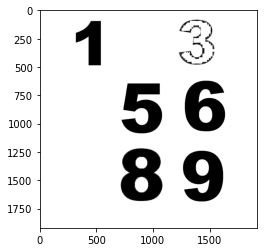

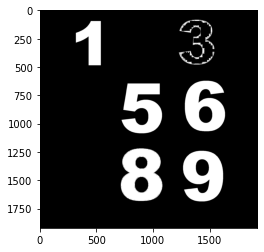

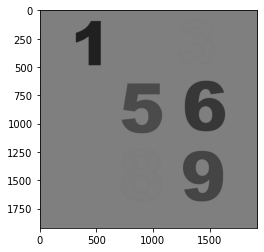

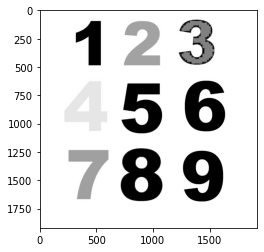

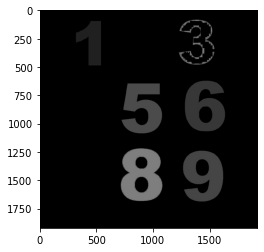

In [11]:
img_3 = cv2.imread('lec03_test2.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)

images = []
ret, thres1 = cv2.threshold(img_3, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img_3, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img_3, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img_3, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img_3, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()


# 적응 임계점 처리 함수
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])

하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋습니다.

- src : 이미지 파일 single - channel(Gray Scale)
- maxvalue: 임계 값을 넘었을 때 적용할 값

- adaptive_method: 임계 값을 결정하는 계산 방법

>1)ADAPTIVE_THRESH_MEAN_C : 지정 Block 내 픽셀의 평균 값에서 C 값을 뺀 값을 문턱 값으로 함

>2)ADAPTIVE_THRESH_GAUSSIAN_C : 지정 Block 내 픽셀의 Gaussian 윈도우 가중치의 합에서 C 값을 뺀 값을 문턱 값으로 함


- type: 임계점을 처리하는 방식

- block_size: 임계 값을 적용할 영역의 크기

- C: 평균이나 가중 평균에서 차감할 값

Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않습니다.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving lec03_test2.png to lec03_test2.png


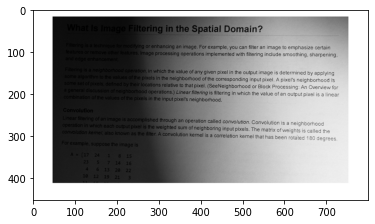

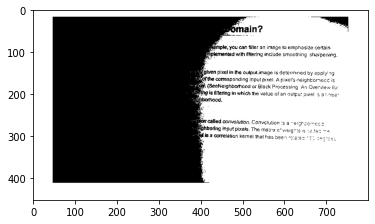

In [22]:
img_4 = cv2.imread('lec03_test2.png')
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2GRAY)
ret, img_4_basic = cv2.threshold(img_4, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(img_4, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_4_basic, cv2.COLOR_GRAY2RGB))
plt.show()

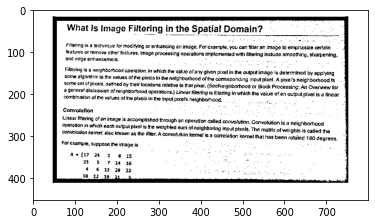

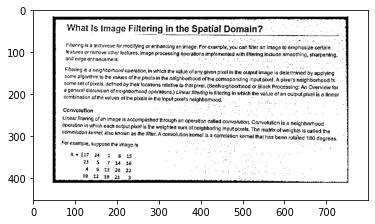

In [36]:
img_4_mean = cv2.adaptiveThreshold(img_4, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)
img_4_gaussian = cv2.adaptiveThreshold(img_4, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)

plt.imshow(cv2.cvtColor(img_4_mean, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_4_gaussian, cv2.COLOR_GRAY2RGB))
plt.show()